# TP Python II : Redressement d'images

Dans ce TP, on met en application les techniques de géométrie projective pour redresser des
images. On s’appuie sur la Section 2.6 et les notations pour les matrices indiquées ci-dessous sont
celles de cette section.

In [1]:
import importlib.metadata
import numpy as np
import matplotlib.pyplot as plt

print("Numpy", importlib.metadata.version('numpy'))
print("Maplotlib", importlib.metadata.version('matplotlib'))

Numpy 2.3.5
Maplotlib 3.10.8


## 4.1 Création des matrices utilisées

### Exercice 4.1.

Créer une fonction `point_vecteur(p)` qui prend en entrée un point $p$ de
coordonnées $(x, y)$ et retourne le vecteur $\begin{bmatrix}x\\ y\\ 1\end{bmatrix}$.

In [2]:
def point_vecteur(p: np.array) -> np.array:
  (x,y) = (p[0], p[1])
  return np.array([x, y, 1], order='F')

In [3]:
p = (5, 2)
print("Point:", p)
print("Point vecteur:", point_vecteur(p))

Point: (5, 2)
Point vecteur: [5 2 1]


### Exercice 4.2.

Créer une fonction `repere_projectif(p_1,p_2,p_3,p_4)` qui prend en entrée
4 points $p_i = (x_i, y_i)$ de $R^2$ et retourne un booléen selon que
les 4 points forment un repère projectif ou non.

On pourra introduire les vecteurs $v_i = (x_i, y_i, 1)$ et utiliser
la fonction `det` de `numpy.linalg`.

In [4]:
def repere_projectif(p_1: np.array, p_2: np.array, p_3: np.array, p_4: np.array) -> bool:
  # Vecteurs
  v_1 = point_vecteur(p_1)
  v_2 = point_vecteur(p_2)
  v_3 = point_vecteur(p_3)
  v_4 = point_vecteur(p_4)
  
  # Matrices
  l1 = np.transpose(np.array([v_1, v_2, v_3]))
  l2 = np.transpose(np.array([v_1, v_2, v_4]))
  l3 = np.transpose(np.array([v_1, v_3, v_4]))
  l4 = np.transpose(np.array([v_2, v_3, v_4]))
  
  # Déterminants
  if np.linalg.det(l1) == 0: return False
  if np.linalg.det(l2) == 0: return False
  if np.linalg.det(l3) == 0: return False
  if np.linalg.det(l4) == 0: return False
  
  return True

In [5]:
print("Tests avec l'exercice 1 d'entraînement au DS...\n")

p1 = (0, 0)
p2 = (3, 1)
p3 = (3, 4)
p4 = (-1, 4)

print("Points:", p1, p2, p3, p4)
print("Repère projectif?", repere_projectif(p1, p2, p3, p4), "(doit être True)")

p1 = (0, 0)
p2 = (3, 4)
p3 = (1, 0)
p4 = (2, 2)

print("\nPoints:", p1, p2, p3, p4)
print("Repère projectif?", repere_projectif(p1, p2, p3, p4), "(doit être False)")

Tests avec l'exercice 1 d'entraînement au DS...

Points: (0, 0) (3, 1) (3, 4) (-1, 4)
Repère projectif? True (doit être True)

Points: (0, 0) (3, 4) (1, 0) (2, 2)
Repère projectif? False (doit être False)


### Exercice 4.3.

Créer une fonction `matrice_A(p_1,p_2,p_3,p_4)` qui prend en entrée 4 points
$p_i = (x_i, y_i)$ de $R^2$ et retourne la matrice $A$ de la Section 2.6.

In [6]:
def matrice_A(p_1: np.array, p_2: np.array, p_3: np.array, p_4: np.array) -> np.array:
  v_1 = point_vecteur(p_1)
  v_2 = point_vecteur(p_2)
  v_3 = point_vecteur(p_3)
  
  mat = np.transpose(np.array([v_1, v_2, v_3]))
  return mat

In [7]:
p1 = (0, 0)
p2 = (3, 1)
p3 = (3, 4)
p4 = (-1, 4)

print("Points:", p1, p2, p3, p4)
print("Matrice A:\n", matrice_A(p1, p2, p3, p4), sep='')

Points: (0, 0) (3, 1) (3, 4) (-1, 4)
Matrice A:
[[0 3 3]
 [0 1 4]
 [1 1 1]]


### Exercice 4.4.

Créer une fonction `matrice_B(p_1,p_2,p_3,p_4)` qui prend en entrée 4 points
$p_i = (x_i, y_i)$ de $R^2$ et retourne la matrice $B$ de la Section 2.6.

In [8]:
def matrice_B(p_1: np.array, p_2: np.array, p_3: np.array, p_4: np.array) -> np.array:
  return np.linalg.inv(matrice_A(p_1, p_2, p_3, p_4))

In [9]:
p1 = (0, 0)
p2 = (3, 1)
p3 = (3, 4)
p4 = (-1, 4)

print("Points:", p1, p2, p3, p4)
print("Matrice B:\n", matrice_B(p1, p2, p3, p4), sep='')

Points: (0, 0) (3, 1) (3, 4) (-1, 4)
Matrice B:
[[-0.33333333  0.          1.        ]
 [ 0.44444444 -0.33333333  0.        ]
 [-0.11111111  0.33333333  0.        ]]


### Exercice 4.5.

Créer une fonction `matrice_C(p_1,p_2,p_3,p_4)` qui prend en entrée 4 points
$p_i = (x_i, y_i)$ de $R^2$ et retourne la matrice $C$ de la Section 2.6.

In [10]:
def matrice_C(p_1: np.array, p_2: np.array, p_3: np.array, p_4: np.array) -> np.array:
  # Calcul des lambdas
  v_4 = point_vecteur(p_4)
  B = matrice_B(p_1, p_2, p_3, p_4)
  (l_1, l_2, l_3) = np.matmul(B, v_4)

  # Matrice C
  A = matrice_A(p_1, p_2, p_3, p_4)
  C = np.matmul(A, np.diag([l_1, l_2, l_3]))
  return C

In [11]:
p1 = (0, 0)
p2 = (3, 1)
p3 = (3, 4)
p4 = (-1, 4)

print("Points:", p1, p2, p3, p4)
print("Matrice C:\n", matrice_C(p1, p2, p3, p4), sep='')

Points: (0, 0) (3, 1) (3, 4) (-1, 4)
Matrice C:
[[ 0.         -5.33333333  4.33333333]
 [ 0.         -1.77777778  5.77777778]
 [ 1.33333333 -1.77777778  1.44444444]]


### Exercice 4.6.

Créer une fonction `matrice_passage(p_1,p_2,p_3,p_4,p_1,p_2,p_3,p_4)`
qui en prend en entrée 2 quadruplets de points, vérifie qu’ils forment
des repères projectifs, si oui retourne la matrice $P$ de la Section
et sinon lève une erreur avec une commande du type:

```python
if condition:
	raise ValueError("Message d'erreur")
```

In [12]:
def matrice_passage(
    p_1: np.array,
    p_2: np.array,
    p_3: np.array,
    p_4: np.array,
    pp_1: np.array,
    pp_2: np.array,
    pp_3: np.array,
    pp_4: np.array
) -> np.array:
  # Check des repères projectifs
  if not repere_projectif(p_1, p_2, p_3, p_4):
    raise ValueError("Le premier repère n'est pas projectif.")
  if not repere_projectif(pp_1, pp_2, pp_3, pp_4):
    raise ValueError("Le second repère n'est pas projectif.")

  # Calcul de C et C'
  C = matrice_C(p_1, p_2, p_3, p_4)
  Cp = matrice_C(pp_1, pp_2, pp_3, pp_4)
  
  # Matrice de passage
  P = np.matmul(Cp, np.linalg.inv(C))
  return P

In [13]:
p1 = (0, 0)
p2 = (1, 0)
p3 = (0, 1)
p4 = (1, 1)

pp_1 = (0, 0)
pp_2 = (2, 0)
pp_3 = (0.5, 2)
pp_4 = (1.5, 2)

print("Premier repère:", p1, p2, p3, p4)
print("Second repère:", pp_1, pp_2, pp_3, pp_4)

P = matrice_passage(p1, p2, p3, p4, pp_1, pp_2, pp_3, pp_4)
print("\nMatrice de passage de C à C':\n", P, sep='')


Premier repère: (0, 0) (1, 0) (0, 1) (1, 1)
Second repère: (0, 0) (2, 0) (0.5, 2) (1.5, 2)

Matrice de passage de C à C':
[[1.  0.5 0. ]
 [0.  2.  0. ]
 [0.  0.5 0.5]]


## 4.2 Changement de perspective sur des images

### Exercice 4.7

Créer une fonction `rectification_projective_A4(p_1, p_2, p_3, p_4, image)`
qui prend en entrée $4$ points $(p1, p2, p3, p4)$ d’une image (préalablement importée avec une
commande du type `image = plt.imread("image.jpg")` et retourne une image au format $A4$ où
le quadrilatère de sommets $p1, p2, p3, p4$ a été redressé sur la nouvelle image au format $A4$.

Pour cela on suivra les instructions suivantes:
1. On créera une nouvelle image noire pour commencer de taille $594*420$ pixels (un $A4$,
c’est $29,7$ cm par $21$ cm, on mutliplie ces nombres par $20$) avec une commande du type
`nouvelle_image = np.zeros((594,420, 3), dtype = np.uint8)`

2. Quelles sont les coordonnées des $4$ coins de la nouvelle image ?

3. Les points $p1$, $p2$, $p3$ et $p4$ seront envoyés sur ces $4$ coins. **Il faudra bien faire attention
à l’ordre!**

4. Pour remplir les pixels de la nouvelle image, on fera une boucle qui parcourt tous les pixels
de la nouvelle image. On appliquera la fonction $g^{−1}$ de la Section 2.6 et on récupèrera les
niveaux de couleurs de l’image initiale comme on a pu le faire dans le premier TP.

5. Tester votre code sur le fichier [`ds.jpg`](./ds.jpg) qui se trouve sur Moodle.
Les $4$ coins sont aux coordonnées suivantes: $(539,37)$, $(2718,1285)$, $(120,1428)$, $(1520,2919)$
si on suit l’ordre haut gauche, bas gauche, haut droit, bas droit.

In [23]:
def rectification_projective(p_1: np.array, p_2: np.array, p_3: np.array, p_4: np.array, image: np.array) -> np.array:
    # 1. Image A4
    nouvelle_image = np.zeros((594, 420, 3), dtype=np.uint8)
    h, w = nouvelle_image.shape[:2]
    
    # 2. Les 4 Coins
    pp_1 = (0, 0)
    pp_2 = (0, h-1)
    pp_3 = (w-1, 0)
    pp_4 = (w-1, h-1)
    
    # 3. Matrice de passage
    P = matrice_passage(p_1, p_2, p_3, p_4, pp_1, pp_2, pp_3, pp_4)
    P_inv = np.linalg.inv(P)
    
    # 4. Remplir les pixels
    img_height, img_width = image.shape[:2]
    
    for y_new in range(h):
        for x_new in range(w):
            # g-1
            v_new = np.array([x_new, y_new, 1])
            v_orig = np.matmul(P_inv, v_new)
            
            # Normalisation
            x_orig = v_orig[0] / v_orig[2]
            y_orig = v_orig[1] / v_orig[2]
            
            if 0 <= x_orig < img_width and 0 <= y_orig < img_height:
                nouvelle_image[y_new, x_new] = image[int(x_orig), int(y_orig)]
    
    return nouvelle_image

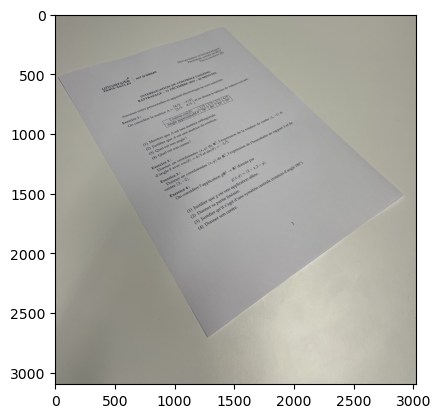

In [24]:
ds = plt.imread("ds.jpg")
plt.imshow(ds)

p1 = (539,37)
p2 = (2718,1285)
p3 = (120,1428)
p4 = (1520,2919)

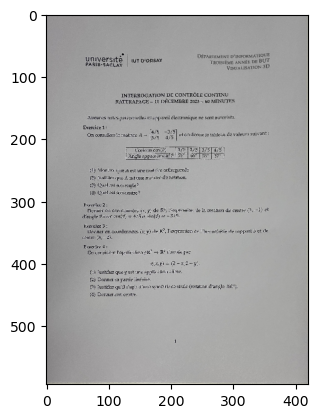

In [25]:
ds_rect = rectification_projective(p1, p2, p3, p4, ds)
plt.imshow(ds_rect)

### Exercice 4.8 (anamorphose des ambassadeurs)

Observer la photographie du tableau "les ambassadeurs" du peintre Holbein qui se trouve dans le dossier du TP sur Moodle.

Que voyez-vous au pied des deux ambassadeurs ? Lorsque l’on regarde le vrai tableau sous un certain angle, on
voit clairement apparaitre la nature de cette forme.

Nous allons utiliser nos outils de changement de perspective pour obtenir le même effet. On parle d'*anamorphose*.

Reprendre votre code de l’Exercice 4.7 pour créer cette anamorphose en suivant les consignes suivantes :
1. L’image initiale sera ambassadeurs.jpg
2. La nouvelle image aura pour taille $1420 * 350$ $(hauteur * largeur)$.
3. Les sommets de l’image initiale seront envoyés sur les points suivants :
  - Coin supérieur gauche : $(5,5)$
  - Coin inférieur gauche : $(947,77)$
  - Coin inférieur droit : $(1413,342)$
  - Coin supérieur droit : $(469,268)$
4. Quelle est la forme que vous voyez apparaître ?

In [28]:
def rectification_projective_dim(p_1: np.array, p_2: np.array, p_3: np.array, p_4: np.array, image: np.array) -> np.array:
    nouvelle_image = np.zeros((1450, 350, 3), dtype=np.uint8)
    h, w = nouvelle_image.shape[:2]
    
    # 2. Les 4 Coins
    pp_1 = (0, 0)
    pp_2 = (0, h-1)
    pp_3 = (w-1, 0)
    pp_4 = (w-1, h-1)
    
    # 3. Matrice de passage
    P = matrice_passage(p_1, p_2, p_3, p_4, pp_1, pp_2, pp_3, pp_4)
    P_inv = np.linalg.inv(P)
    
    # 4. Remplir les pixels
    img_height, img_width = image.shape[:2]
    
    for y_new in range(h):
        for x_new in range(w):
            # g-1
            v_new = np.array([x_new, y_new, 1])
            v_orig = np.matmul(P_inv, v_new)
            
            # Normalisation
            if v_orig[2] == 0:
                continue
            x_orig = v_orig[0] / v_orig[2]
            y_orig = v_orig[1] / v_orig[2]
                
            xi = int(round(x_orig))
            yi = int(round(y_orig))
            if 0 <= xi < img_width and 0 <= yi < img_height:
                nouvelle_image[y_new, x_new] = image[yi, xi]
    
    return nouvelle_image

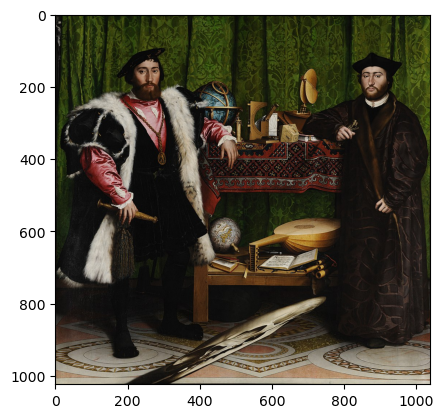

In [29]:
anamorphose = plt.imread('ambassadeurs.jpg')
plt.imshow(anamorphose)

p1 = (5,5)
p2 = (947,77)
p3 = (1413,342)
p4 = (469,268)
dim = (1420, 350)

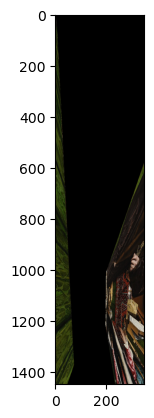

In [30]:
anamorphose_rect = rectification_projective_dim(p1, p2, p3, p4, anamorphose)
plt.imshow(anamorphose_rect)

### Exercice 4.9.

Pour cet exercise, c’est à vous de prendre en photo un document $A4$ pour le redresser.
1. Charger la photo que vous avez prise dans votre dossier courant.
2. Récupérer les coordonnées des 4 sommets de votre document. Pour cela, il y a plusieurs
possibilités :
  - Lancer la commande magique `matplotlib qt` pour acher l’image dans une nouvelle
  fenêtre et lire les coordonnées en déplaçant la souris.
  Il faut faire attention à l’ordre des coordonnées.
  - Ou tiliser un logiciel de traitement d’images et acher les règles pour les coordonnées.
3. Appliquer la fonction `rectification_projective_A4(p_1,p_2,p_3,p_4,image)` avec les
bonnes coordonnées.

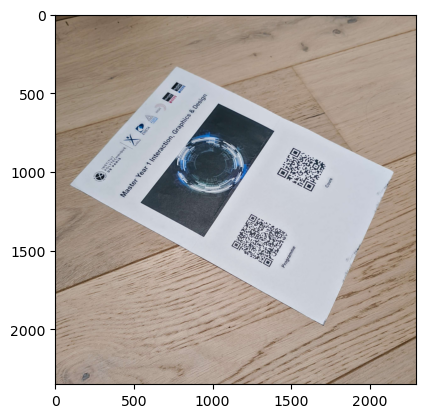

In [31]:
master = plt.imread('master.jpg')
plt.imshow(master)

#%matplotlib qt

In [33]:
p1 = (92, 1070)
p2 = (1690, 1960)
p3 = (2150, 990)
p4 = (766, 326)

master_rect = rectification_projective(p1, p2, p3, p4, master)
plt.imshow(master_rect)

IndexError: index 2309 is out of bounds for axis 1 with size 2296